In [11]:
import pandas as pd
from newspaper import Article
from tqdm import tqdm
import datetime as dt

from utils import *

#### Google news URL extraction

In [5]:
# URL of Google News "Crude Oil" search
url = 'https://news.google.com/search?q=crude%20oil&hl=no&gl=NO&ceid=NO%3Ano'

# Get list of article url's from Google News
article_list = get_url_gnews(url)

# Get article information from url's
df = create_news_df(article_list)

pd.set_option('display.max_rows', None)
display(df)

# save df to .json with indent
df.to_json('data.json', indent=1)


 11%|█▏        | 11/96 [00:11<02:18,  1.63s/it]C:\Users\joneh\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
100%|██████████| 96/96 [01:59<00:00,  1.25s/it]

74 of 96 articles scraped


,title,text,url,date
0,Exclusive: Indian PM to announce massive cuts ...,Get ready for a New Year bonanza. With the gen...,https://news.google.com/articles/CBMifmh0dHBzO...,None
1,"Qatar, Shell ink five-year crude oil supply deal","According to a report by Reuters, Qatar has ag...",https://news.google.com/articles/CBMiWGh0dHBzO...,None
2,"Shell Singapore, QatarEnergy Ink 5-Year Crude ...",,https://news.google.com/articles/CBMicWh0dHBzO...,None
3,"NLC’s methanol plant aims to conserve ₹1,000 c...","NLC India, the public sector mining and power ...",https://news.google.com/articles/CBMikwFodHRwc...,2023-12-28 04:11:31+00:00
4,Hindustan Petroleum Shares Near Six-Year High ...,Shares of the Hindustan Petroleum Corp. rose o...,https://news.google.com/articles/CBMicmh0dHBzO...,None
5,"Asia oil/products: Crude prices retreat, refin...",Please Register or Sign in to view this conten...,https://news.google.com/articles/CBMiaWh0dHBzO...,None
6,The 200 SMA to Decide Where Crude Oil Heads Th...,wti-usd\n\nCrude oil has been sliding for a fe...,https://news.google.com/articles/CBMiYGh0dHBzO...,2023-12-28 13:28:42+00:00
7,Oil Brief: Brent Crude Down 1.1% at About US$7...,Secure and Increase the Performance of your In...,https://news.google.com/articles/CBMiemh0dHBzO...,2023-12-28 13:06:05+01:00
8,Oil drops almost 2% as investors watch Red Sea...,NEW YORK –Oil prices dropped nearly 2 percent ...,https://news.google.com/articles/CBMiX2h0dHBzO...,2023-12-28 07:51:12
9,Fuel Price Reduction in 2024: A Possibility Am...,Fuel Price Reduction in 2024: A Possibility Am...,https://news.google.com/articles/CBMihQFodHRwc...,2023-12-28 10:37:22+00:00


In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create SentimentIntensityAnalyzer object

df = df.dropna()
# Remove tz from date column

df.index = [i.replace(tzinfo=None) for i in df['date']]

# remove index 4
df = df.drop(df.index[5])

# sort by date
df = df.sort_index()

sid = SentimentIntensityAnalyzer()

# Create list of sentiment scores
sentiment_scores = [sid.polarity_scores(article)['compound'] for article in df['text']]
df['sentiment'] = sentiment_scores

# Display df
display(df)

,title,text,url,date,sentiment
2023-12-21 10:00:00.000,November 2023 — Monthly analysis on Russian fo...,Note on methodology:\n\nUpdate 2023-10-19 – We...,https://news.google.com/articles/CBMiamh0dHBzO...,2023-12-21 10:00:00+00:00,0.5267
2023-12-23 19:33:19.000,Oil reports biggest weekly gain in 2 months on...,Crude oil posted the biggest weekly gain since...,https://news.google.com/articles/CBMiqwFodHRwc...,2023-12-23 19:33:19+05:30,-0.9557
2023-12-25 10:37:36.000,First rupee payment for oil to UAE: India look...,"December 25, 2023 04:07 pm | Updated 04:07 pm ...",https://news.google.com/articles/CBMikAFodHRwc...,2023-12-25 10:37:36+00:00,-0.8740
2023-12-25 16:57:24.000,Crude oil prices hover below $80/bbl amid Ango...,Check Free Credit Score on Moneycontrol: Easil...,https://news.google.com/articles/CBMimwFodHRwc...,2023-12-25 16:57:24+05:30,0.8955
2023-12-26 11:52:36.000,India's push for rupee as payment currency for...,The oil ministry said that India's push for ru...,https://news.google.com/articles/CBMikgFodHRwc...,2023-12-26 11:52:36+05:30,-0.9893
2023-12-26 22:17:22.000,Oil jumps over 2% to hit 1-month high on Red S...,"Oil jumped over two per cent on Tuesday, Decem...",https://news.google.com/articles/CBMimgFodHRwc...,2023-12-26 22:17:22+05:30,-0.9269
2023-12-27 05:29:37.000,Reuters: Payment problems delay Russian oil sh...,This audio is created with AI assistance\n\nPa...,https://news.google.com/articles/CBMiUmh0dHBzO...,2023-12-27 05:29:37+00:00,-0.1280
2023-12-27 06:33:46.000,Commodity Futures | A multi-month breakout is ...,in this edition of Moneycontrol Pro Panorama: ...,https://news.google.com/articles/CBMifmh0dHBzO...,2023-12-27 06:33:46+05:30,0.9873
2023-12-27 08:10:35.000,FPSO en route to Senegal’s first offshore oil ...,"December 27, 2023, by Nadja Skopljak\n\nThe fl...",https://news.google.com/articles/CBMiWWh0dHBzO...,2023-12-27 08:10:35+00:00,0.9923
2023-12-27 13:18:13.000,Suez Canal crisis: Experts analyse where crude...,The ongoing crisis in the Red Sea has led to w...,https://news.google.com/articles/CBMidWh0dHBzO...,2023-12-27 13:18:13+05:30,-0.9887


<Axes: xlabel='date', ylabel='sentiment'>

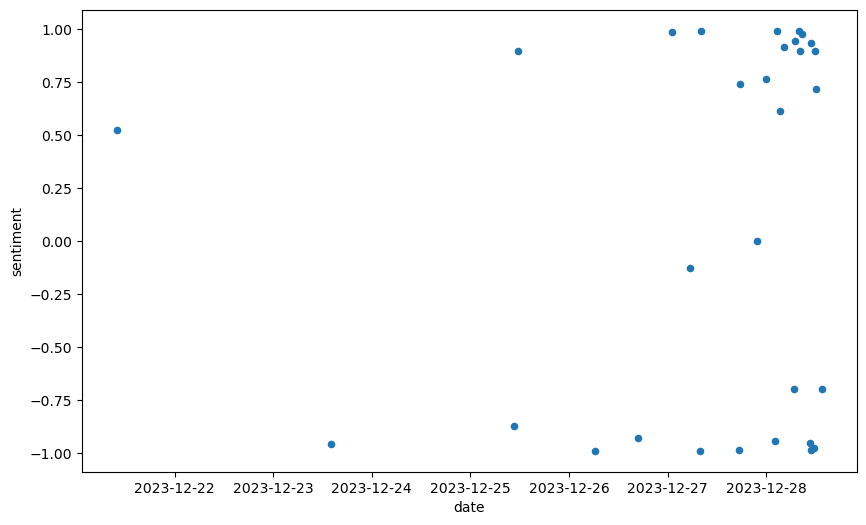

In [42]:
from matplotlib import pyplot as plt

df.plot(kind='scatter', x='date', y='sentiment', figsize=(10, 6))